In [26]:
from xgboost import XGBRFClassifier, plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [27]:
# Load the wine dataset
wine = datasets.load_wine()

# Separate features and target variable
X = wine.data  # Features
y = wine.target  # Target labels (wine type)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
# Create and train an XGBoost Random Forest Classifier
model = XGBRFClassifier(random_state=42).fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 1.0


<Axes: >

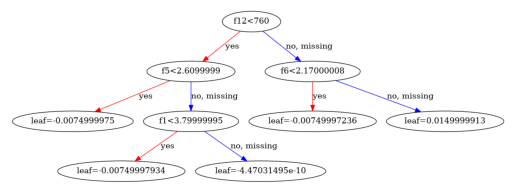

In [29]:
plot_tree(model, num_trees=0)